<a href="https://colab.research.google.com/github/hkUMFlint/CSC-302/blob/main/Henry_midterm_db_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
                      Worked With  Want to Work With
PostgreSQL                  25536              24005
SQLite                      17365              13489
MySQL                       21099              12269
MongoDB                     13007              10982
Redis                       10463              10847
Microsoft SQL Server        13275               7905
Elasticsearch                6533               6246
MariaDB                      8991               5947
Dynamodb                     4138               3503
Supabase                     2078               2930


<Figure size 1200x600 with 0 Axes>

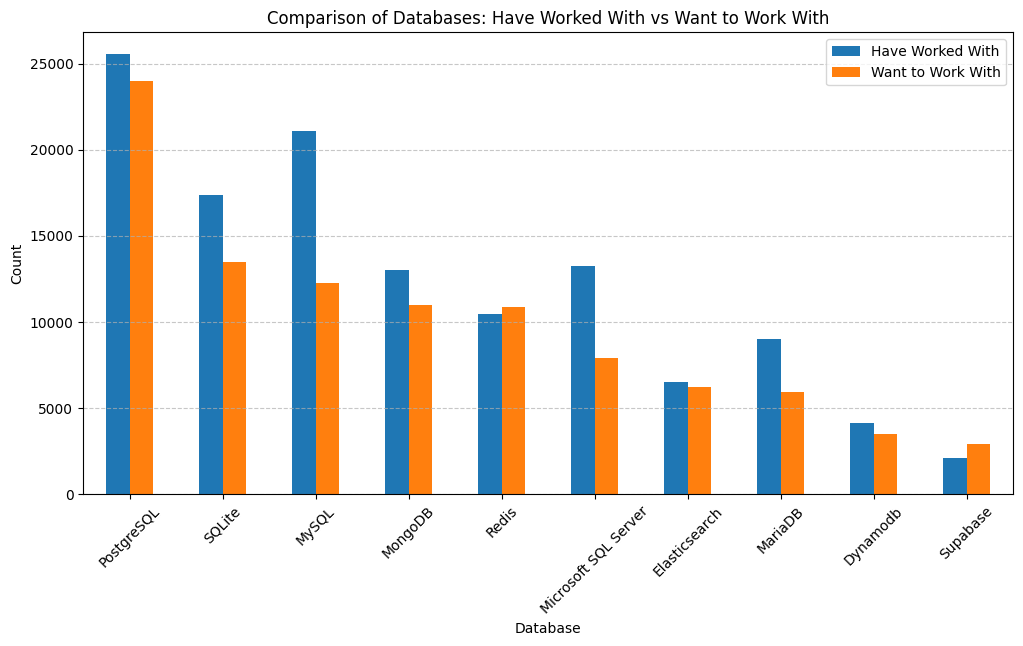

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from google.colab import drive
drive.mount("/content/drive")

df = pd.read_csv('/content/drive/My Drive/2024_survey_results_public.csv')

# Extract the two relevant columns
worked_with = df['DatabaseHaveWorkedWith'].dropna().str.split(';').explode()
want_to_work_with = df['DatabaseWantToWorkWith'].dropna().str.split(';').explode()

# Count occurrences of each database
worked_with_counts = worked_with.value_counts()
want_to_work_with_counts = want_to_work_with.value_counts()

# Combine into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'Worked With': worked_with_counts,
    'Want to Work With': want_to_work_with_counts
}).fillna(0)

# Convert to integers
comparison_df = comparison_df.astype(int)

# Sort by most wanted databases
comparison_df = comparison_df.sort_values(by='Want to Work With', ascending=False)

# Display the top results
print(comparison_df.head(10))

# Visualization
plt.figure(figsize=(12, 6))
comparison_df.head(10).plot(kind='bar', figsize=(12,6))
plt.title("Comparison of Databases: Have Worked With vs Want to Work With")
plt.xlabel("Database")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(["Have Worked With", "Want to Work With"])
plt.show()